## Carregando os dados

In [1]:
import pandas as pd

In [2]:
# Os dados já estão separados entre treino e teste
url1 = 'https://raw.githubusercontent.com/alura-cursos/combina-classificadores/main/dados/train.csv'
url2 = 'https://raw.githubusercontent.com/alura-cursos/combina-classificadores/main/dados/test.csv'

In [3]:
train = pd.read_csv(url1)
test = pd.read_csv(url2) 

In [4]:
train.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [6]:
train.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [7]:
from sklearn.preprocessing import OneHotEncoder


def pre_processing(df: pd.DataFrame):
    df = df.drop(columns=["Unnamed: 0", "id"])
    df.dropna(inplace=True)
    df.reset_index(inplace=True)

    encoder = OneHotEncoder(drop="if_binary")
    categorical_columns = [
        "Gender", "Customer Type", "Type of Travel", "Class"]

    df_categorical = df[categorical_columns]
    df_encoded = pd.DataFrame(
        encoder.fit_transform(df_categorical).toarray(),
        columns=encoder.get_feature_names_out(categorical_columns)
    )
    df_transformed = pd.concat(
        [df.drop(columns=categorical_columns), df_encoded],
        axis=1
    )

    x = df_transformed.drop(columns=["satisfaction"])
    y = df_transformed["satisfaction"]
    return x, y

In [8]:
x_train, y_train = pre_processing(train)
x_test, y_test = pre_processing(test)

In [9]:
x_train.head(5)

,index,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,0,13,460,3,4,3,1,5,3,5,...,5,5,25,18.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1,25,235,3,2,3,3,1,3,1,...,4,1,1,6.0,1.0,1.0,0.0,1.0,0.0,0.0
2,2,26,1142,2,2,2,2,5,5,5,...,4,5,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,25,562,2,5,5,5,2,2,2,...,4,2,11,9.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,61,214,3,3,3,3,4,5,5,...,3,3,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [31]:
y_train

0         neutral or dissatisfied
1         neutral or dissatisfied
2                       satisfied
3         neutral or dissatisfied
4                       satisfied
                   ...           
103589    neutral or dissatisfied
103590                  satisfied
103591    neutral or dissatisfied
103592    neutral or dissatisfied
103593    neutral or dissatisfied
Name: satisfaction, Length: 103594, dtype: object

## Combinando modelos

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier

pipelines = {
    "Tree": Pipeline([("Tree", DecisionTreeClassifier())]),
    "Logistic": Pipeline([("Scaler", StandardScaler()), ("Logistic", LogisticRegression())]),
    "GaussianNB": Pipeline([("Scaler", StandardScaler()), ("GaussianNB", GaussianNB())])
}

voting = VotingClassifier(
    estimators=[
        ("Tree", pipelines["Tree"]), 
        ("Logistic", pipelines["Logistic"]),
        ("GaussianNB", pipelines["GaussianNB"])
    ],
    voting="hard"
)
voting

VotingClassifier(estimators=[('Tree',
                              Pipeline(steps=[('Tree',
                                               DecisionTreeClassifier())])),
                             ('Logistic',
                              Pipeline(steps=[('Scaler', StandardScaler()),
                                              ('Logistic',
                                               LogisticRegression())])),
                             ('GaussianNB',
                              Pipeline(steps=[('Scaler', StandardScaler()),
                                              ('GaussianNB', GaussianNB())]))])

In [11]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

stratified_kfold = StratifiedKFold(shuffle=True)
cv_results = cross_val_score(voting, x_train, y_train, cv=stratified_kfold)
cv_results.mean()

0.8934494301424742

In [12]:
voting = VotingClassifier(
    estimators=[
        ("Tree", pipelines["Tree"]), 
        ("Logistic", pipelines["Logistic"]),
        ("GaussianNB", pipelines["GaussianNB"])
    ],
    voting="soft"
)
stratified_kfold = StratifiedKFold(shuffle=True)
cv_results = cross_val_score(voting, x_train, y_train, cv=stratified_kfold)
cv_results.mean()

0.9041836311840982

## Busca dos melhores parâmetros para a votação

In [13]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    "voting": ["hard", "soft"],
    "weights": [(1, 1, 1), (2, 1, 1), (1, 2, 1), (1, 1, 2)]
}

grid_search = GridSearchCV(voting, grid_params, n_jobs=-1)
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'voting': 'soft', 'weights': (2, 1, 1)}

In [14]:
grid_search.best_score_

0.9381045417622605

In [15]:
from sklearn.metrics import classification_report

y_pred = grid_search.predict(x_test)
print(classification_report(y_test, y_pred))

                         precision    recall  f1-score   support

neutral or dissatisfied       0.95      0.95      0.95     14528
              satisfied       0.93      0.94      0.94     11365

               accuracy                           0.94     25893
              macro avg       0.94      0.94      0.94     25893
           weighted avg       0.94      0.94      0.94     25893



## Implementação do Bagging

In [16]:
from sklearn.ensemble import BaggingClassifier

model = DecisionTreeClassifier(random_state=0)
bagging = BaggingClassifier(model, n_estimators=10, random_state=0)
bagging.fit(x_train, y_train)
y_pred = bagging.predict(x_test)
print(classification_report(y_test, y_pred))

                         precision    recall  f1-score   support

neutral or dissatisfied       0.95      0.98      0.96     14528
              satisfied       0.97      0.94      0.95     11365

               accuracy                           0.96     25893
              macro avg       0.96      0.96      0.96     25893
           weighted avg       0.96      0.96      0.96     25893



## Bagging com GridSearchCV

In [17]:
grid_params = {
    'n_estimators': [10, 20, 30],
    'max_samples': [0.5, 0.7, 0.9],
    'max_features': [0.5, 0.7, 0.9],
}

base_model = DecisionTreeClassifier(random_state=0)
bagging_model = BaggingClassifier(base_model, n_estimators=10, random_state=0)
bagging_grid = GridSearchCV(
    bagging_model,
    grid_params,
    cv=stratified_kfold,
    n_jobs=-1
)

bagging_grid.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(random_state=0),
                                         random_state=0),
             n_jobs=-1,
             param_grid={'max_features': [0.5, 0.7, 0.9],
                         'max_samples': [0.5, 0.7, 0.9],
                         'n_estimators': [10, 20, 30]})

In [18]:
best_params = bagging_grid.best_params_
best_params

{'max_features': 0.9, 'max_samples': 0.9, 'n_estimators': 30}

In [19]:
bagging_model = BaggingClassifier(base_model, **best_params)
bagging_model.fit(x_train, y_train)
y_pred = bagging_model.predict(x_test)
print(classification_report(y_test, y_pred))

                         precision    recall  f1-score   support

neutral or dissatisfied       0.96      0.98      0.97     14528
              satisfied       0.97      0.94      0.96     11365

               accuracy                           0.96     25893
              macro avg       0.96      0.96      0.96     25893
           weighted avg       0.96      0.96      0.96     25893



## Extra Trees Classifier

In [20]:
from sklearn.ensemble import ExtraTreesClassifier

grid_params = {
    'n_estimators': [10, 20, 30],
    'max_features': [0.5, 0.7, 0.9],
}

extratrees_grid = GridSearchCV(
    ExtraTreesClassifier(),
    grid_params,
    cv=StratifiedKFold(shuffle=True),
    n_jobs=-1
)
extratrees_grid.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'max_features': [0.5, 0.7, 0.9],
                         'n_estimators': [10, 20, 30]})

In [21]:
best_params = extratrees_grid.best_params_

extratress_classifier = ExtraTreesClassifier(**best_params)
extratress_classifier.fit(x_train, y_train)
y_pred = extratress_classifier.predict(x_test)
print(classification_report(y_test, y_pred))

                         precision    recall  f1-score   support

neutral or dissatisfied       0.96      0.98      0.97     14528
              satisfied       0.97      0.94      0.96     11365

               accuracy                           0.96     25893
              macro avg       0.96      0.96      0.96     25893
           weighted avg       0.96      0.96      0.96     25893



In [22]:
extratrees_grid.best_score_

0.9634534856688234

## Implementando AdaBoostClassifier

In [23]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=50, learning_rate=1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

/Users/leandrosouza/workspace/machine-learning-client-satisfaction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


                         precision    recall  f1-score   support

neutral or dissatisfied       0.95      0.95      0.95     14528
              satisfied       0.94      0.94      0.94     11365

               accuracy                           0.95     25893
              macro avg       0.94      0.95      0.94     25893
           weighted avg       0.95      0.95      0.95     25893



## GridSearch com AdaBoostClassifier

In [24]:
grid_params = {
    'n_estimators': [50,100,200],
    'learning_rate': [0.1,0.01,0.001]
}

ada_boost_search = GridSearchCV(
    AdaBoostClassifier(),
    grid_params,
    cv=StratifiedKFold(shuffle=True),
    n_jobs=-1
)
ada_boost_search.fit(x_train, y_train)

/Users/leandrosouza/workspace/machine-learning-client-satisfaction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/leandrosouza/workspace/machine-learning-client-satisfaction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/leandrosouza/workspace/machine-learning-client-satisfaction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/leandrosouza/workspace/machine-learning-client-satisfaction/.venv/lib/pytho

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'n_estimators': [50, 100, 200]})

In [25]:
y_pred = ada_boost_search.predict(x_test)
print(classification_report(y_test, y_pred))

                         precision    recall  f1-score   support

neutral or dissatisfied       0.92      0.94      0.93     14528
              satisfied       0.93      0.90      0.91     11365

               accuracy                           0.92     25893
              macro avg       0.92      0.92      0.92     25893
           weighted avg       0.92      0.92      0.92     25893



In [26]:
ada_boost_search.best_score_

0.9256230948413325

## Implementando CatBoost

In [27]:
from catboost import CatBoostClassifier

param_grid = {
    'iterations': [100, 200, 300],
    'depth': [4, 6, 8],
    'learning_rate': [0.1, 0.01, 0.001]
}

catboost_search = GridSearchCV(
    estimator=CatBoostClassifier(verbose=0),
    param_grid=param_grid,
    cv=StratifiedKFold(shuffle=True),
    n_jobs=-1
)
catboost_search.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=<catboost.core.CatBoostClassifier object at 0x307671220>,
             n_jobs=-1,
             param_grid={'depth': [4, 6, 8], 'iterations': [100, 200, 300],
                         'learning_rate': [0.1, 0.01, 0.001]})

In [28]:
y_pred = catboost_search.predict(x_test)
print(classification_report(y_test, y_pred))

                         precision    recall  f1-score   support

neutral or dissatisfied       0.96      0.98      0.97     14528
              satisfied       0.97      0.95      0.96     11365

               accuracy                           0.96     25893
              macro avg       0.96      0.96      0.96     25893
           weighted avg       0.96      0.96      0.96     25893



## Stacking Classifier

In [29]:
from sklearn.ensemble import StackingClassifier

modelos_base = [
    ("Tree", pipelines["Tree"]), 
    ("Logistic", pipelines["Logistic"]),
    ("GaussianNB", pipelines["GaussianNB"])
]

modelo_meta = LogisticRegression(random_state=42)

stacking_classifier = StackingClassifier(
    estimators=modelos_base,
    final_estimator=modelo_meta
)

stacking_classifier.fit(x_train, y_train)

StackingClassifier(estimators=[('Tree',
                                Pipeline(steps=[('Tree',
                                                 DecisionTreeClassifier())])),
                               ('Logistic',
                                Pipeline(steps=[('Scaler', StandardScaler()),
                                                ('Logistic',
                                                 LogisticRegression())])),
                               ('GaussianNB',
                                Pipeline(steps=[('Scaler', StandardScaler()),
                                                ('GaussianNB',
                                                 GaussianNB())]))],
                   final_estimator=LogisticRegression(random_state=42))

In [30]:
y_pred = stacking_classifier.predict(x_test)
print(classification_report(y_test, y_pred))

                         precision    recall  f1-score   support

neutral or dissatisfied       0.95      0.95      0.95     14528
              satisfied       0.93      0.94      0.94     11365

               accuracy                           0.94     25893
              macro avg       0.94      0.94      0.94     25893
           weighted avg       0.94      0.94      0.94     25893



## Stacking Classifier CV

In [32]:
from mlxtend.classifier import StackingCVClassifier

parametros_cat = catboost_search.best_params_
parametros_trees = extratrees_grid.best_params_

modelos_base = [
    CatBoostClassifier(**parametros_cat),
    ExtraTreesClassifier(**parametros_trees),
    pipelines["GaussianNB"]
]

mapeamento = {"neutral or dissatisfied": 0, "satisfied": 1}
y_train = y_train.replace(mapeamento)
y_test = y_test.replace(mapeamento)

stacking_cv_classifier = StackingCVClassifier(
    classifiers=modelos_base,
    meta_classifier=modelo_meta
)
stacking_cv_classifier.fit(x_train, y_train)

/var/folders/8d/p62zxc3n0ljdttr3h5pjwls40000gn/T/ipykernel_5355/632222938.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train = y_train.replace(mapeamento)
/var/folders/8d/p62zxc3n0ljdttr3h5pjwls40000gn/T/ipykernel_5355/632222938.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test = y_test.replace(mapeamento)


0:	learn: 0.5028504	total: 14.5ms	remaining: 4.34s
1:	learn: 0.4107051	total: 21.6ms	remaining: 3.22s
2:	learn: 0.3402309	total: 28.7ms	remaining: 2.84s
3:	learn: 0.2810053	total: 36.5ms	remaining: 2.7s
4:	learn: 0.2474093	total: 44.3ms	remaining: 2.62s
5:	learn: 0.2233640	total: 51.7ms	remaining: 2.53s
6:	learn: 0.1974753	total: 59ms	remaining: 2.47s
7:	learn: 0.1841854	total: 66.9ms	remaining: 2.44s
8:	learn: 0.1753825	total: 74.3ms	remaining: 2.4s
9:	learn: 0.1645900	total: 82.7ms	remaining: 2.4s
10:	learn: 0.1567219	total: 90.8ms	remaining: 2.38s
11:	learn: 0.1501916	total: 98.5ms	remaining: 2.36s
12:	learn: 0.1459102	total: 106ms	remaining: 2.34s
13:	learn: 0.1413705	total: 114ms	remaining: 2.34s
14:	learn: 0.1381579	total: 122ms	remaining: 2.31s
15:	learn: 0.1359467	total: 130ms	remaining: 2.3s
16:	learn: 0.1305840	total: 139ms	remaining: 2.31s
17:	learn: 0.1283904	total: 148ms	remaining: 2.31s
18:	learn: 0.1269838	total: 156ms	remaining: 2.31s
19:	learn: 0.1250451	total: 165ms	r

StackingCVClassifier(classifiers=[<catboost.core.CatBoostClassifier object at 0x3076cc980>,
                                  ExtraTreesClassifier(max_features=0.9,
                                                       n_estimators=30),
                                  Pipeline(steps=[('Scaler', StandardScaler()),
                                                  ('GaussianNB',
                                                   GaussianNB())])],
                     meta_classifier=LogisticRegression(random_state=42))

In [33]:
y_pred = stacking_cv_classifier.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14528
           1       0.97      0.94      0.96     11365

    accuracy                           0.96     25893
   macro avg       0.97      0.96      0.96     25893
weighted avg       0.96      0.96      0.96     25893



### Verificando a consistência dos modelos

In [34]:
stacking_validation = cross_val_score(
    stacking_cv_classifier,
    x_train,
    y_train,
    cv=StratifiedKFold(n_splits=5, shuffle=True),
    n_jobs=-1
)

0:	learn: 0.5099104	total: 85.5ms	remaining: 25.5s
0:	learn: 0.5085055	total: 86ms	remaining: 25.7s
0:	learn: 0.5088790	total: 85.5ms	remaining: 25.6s
0:	learn: 0.5042364	total: 88.1ms	remaining: 26.4s
0:	learn: 0.5070019	total: 89.5ms	remaining: 26.7s
1:	learn: 0.4152079	total: 110ms	remaining: 16.4s
1:	learn: 0.4116254	total: 114ms	remaining: 17s
1:	learn: 0.4063178	total: 117ms	remaining: 17.5s
1:	learn: 0.4109579	total: 117ms	remaining: 17.5s
1:	learn: 0.4140822	total: 116ms	remaining: 17.3s
2:	learn: 0.3322425	total: 143ms	remaining: 14.2s
2:	learn: 0.3318532	total: 143ms	remaining: 14.2s
2:	learn: 0.3326493	total: 145ms	remaining: 14.4s
2:	learn: 0.3274563	total: 147ms	remaining: 14.6s
2:	learn: 0.3315218	total: 149ms	remaining: 14.7s
3:	learn: 0.2894528	total: 163ms	remaining: 12.1s
3:	learn: 0.2936946	total: 172ms	remaining: 12.7s
3:	learn: 0.2772096	total: 179ms	remaining: 13.2s
3:	learn: 0.2961184	total: 178ms	remaining: 13.2s
4:	learn: 0.2603475	total: 188ms	remaining: 11.1s

### Métricas

In [36]:
stacking_validation

array([0.96249819, 0.9622086 , 0.96158116, 0.96356002, 0.96447534])

In [38]:
# Acurácia
stacking_validation.mean()

0.9628646602184995

In [39]:
from mlxtend.evaluate import scoring

scoring(y_target=y_test, y_predicted=y_pred, metric="error")

0.03638048893523349

In [40]:
scoring(y_target=y_test, y_predicted=y_pred, metric="precision")

0.9747654186025325

In [41]:
scoring(y_target=y_test, y_predicted=y_pred, metric="recall")

0.9414870215574132

In [42]:
scoring(y_target=y_test, y_predicted=y_pred, metric="f1")

0.9578372571837794

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

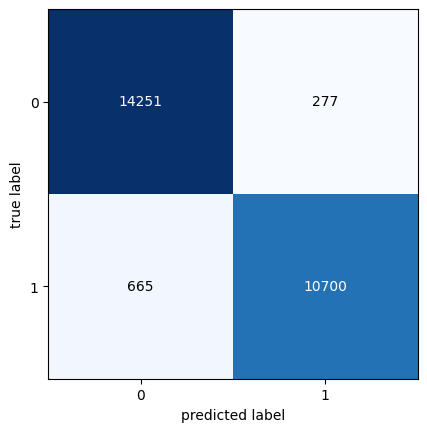

In [43]:
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.evaluate import confusion_matrix

plot_confusion_matrix(confusion_matrix(y_test, y_pred))